In [10]:
using Gadfly
using ForwardDiff
using Roots

In [2]:
mutable struct PersonInformation
    ekg_reading
    pr_interval
    qrs_interval
    st_segment
    qt_interval
    pwave_area
end

In [3]:
#patients =Array{PersonInformation,1}

function getPatient(fileName::String,n)
    inputFile = open(fileName)
    currentline = readline(inputFile)
    currentline = readline(inputFile)
    person =Array{Float64,1}
    
    while(!isempty(currentline))
        timex= split(currentline, ",")
        txp = parse(Float64,timex[n])
        person= cat(person,txp;dims=1)
        currentline = readline(inputFile)
    end
    deleteat!(person,1)
    p=PersonInformation(person,0.0,0.0,0.0,0.0,0.0)
    close(inputFile)
    return p
end
        
function readOneFile(fileName::String)
    inputFile = open(fileName)
    patients =Array{PersonInformation,1}
    rowLength =length(split(readline(inputFile),","))
    close(inputFile)
    if(rowLength==3)
        patients = cat(patients,getPatient(fileName,3);dims=1)
    elseif(rowLength>3)
        n=0
        while((2*n)+3<=rowLength)
            patient =getPatient(fileName,(2*n)+3)
            patients = cat(patients,patient;dims=1)
            n+=1
        end
    else
        return error("The length of rows is incompatable")
    end
    return patients
end

function readAllFiles(dir ::String)
    inputFiles= readdir(dir)
    patients =Array{PersonInformation,1}
    for fileName in inputFiles
        readOneFile(dir*"/"*fileName)
    end

    return patients
end

readAllFiles (generic function with 1 method)

In [4]:
p =getPatient("patients/patient0.csv",3)
t=map(x-> 0.005*(x-1),keys(p.ekg_reading))
y1=map(y->y-1, values(p.ekg_reading))
#plot(layer(x=t,y=y1),layer(x=t,y=y1,Geom.line))
plot(layer(x=t,y=y1,Geom.line))

LoadError: UndefVarError: layer not defined

In [5]:
"""
Return a degree `deg` polynomial function that is the least squares fit to the data
`(x1,y1), (x2, y2), ... , (xn,yn)` The first argument to `least_squares_fit` is an
array of the values `x1` through `xn` and the second argument is an array of the values `y1` through `yn`.

__Notes__ The arrays `x` and `y` should be the same length, but we don't check that's true. The degree `deg` should 
be positive, but we don't check that either.  This function evaluates the infinity norm matrix condition number 
of the normal equations matrix, but it doens't do anything with the value. Maybe it should issue or warning error when
the condition number is large.
"""
function least_squares_fit(x::Array, y::Array, deg::Integer)
    n = length(x)
    m = [x[i]^j for i=1:length(x), j=0:deg]
    y = [y[i] for i=1:length(y),j=1:1]
    mm = (transpose(m) * m)
    p, c = mm \ transpose(m) * y, cond(mm,Inf)
    t -> @evalpoly(t, p...)
end

least_squares_fit

In [6]:
xs=0:0.005: 3

0.0:0.005:3.0

In [11]:
using Interpolations
fn = CubicSplineInterpolation(xs, y1)

601-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:602), BSpline(Cubic(Line(OnGrid())))), (0.0:0.005:3.0,)), Throw()) with element type Float64:
 -0.99459260927844
 -0.9773847507400999
 -0.9542816305951
 -0.9351333443026999
 -0.9252937086044
 -0.9283817921422
 -0.9421584986068
 -0.9596637092016
 -0.9770679768047998
 -0.9939710608423898
 -1.0086351174925798
 -1.0184781898768003
 -1.0228947348277
  ⋮
 -0.8082632781519999
 -0.671970050572
 -0.5338336563499999
 -0.45621731092299994
 -0.48307032336099986
 -0.6052393574299999
 -0.7796243249420001
 -0.9608041251201
 -1.113526587026
 -1.2191151573509997
 -1.2743219417159999
 -1.28335412306

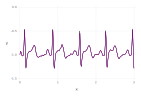

In [12]:
plot(layer(x -> fn(x),0,3,Geom.line, color=[colorant"purple"]),
layer(x=t,y=y1,Geom.line,color=[colorant"black"]))

use forwardDiff to find the zeros, Root.jl, draw the roots, update to 1.7.2

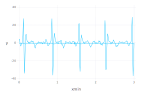

In [63]:
dfn= x->ForwardDiff.derivative(fn,x)

plot(layer(x -> dfn(x),0,3),layer(x -> fn(x),0,3))